## Data Cleaning and Preparation

- Removing duplicate data
- Handling missing info and blank cells
- Typing
- Removing unwanted data
- ...

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the file and overview
books_df = pd.read_csv("BX_Books.csv", sep= ";", encoding="latin-1")
book_ratings_df =pd.read_csv("BX-Book-Ratings.csv", sep= ";", encoding="latin-1")
users_df = pd.read_csv("BX-Users.csv", sep= ";", encoding="latin-1")

In [3]:
books_df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
book_ratings_df.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_df.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Removing outliers
We can assume books data are checked before being put on the website but anyone can sign up with fake information, and the only relevant user info we have is their Age

In [6]:
users_df.loc[(users_df["Age"]>99) | (users_df["Age"]<10),"Age"] = np.nan

#### Removing Empty/Null Cells
Note that some fields can be filled with mean data instead of removing them, users age is an example

In [7]:
print(books_df.isnull().sum())
books_df.dropna(inplace=True)
book_ratings_df.dropna(inplace=True)
users_df.dropna(inplace=True)
users_df["Age"] = users_df["Age"].fillna(users_df["Age"].mean())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


#### Setting proper datatypes

In [8]:
users_df["Age"] = users_df["Age"].astype(int)
users_df["User-ID"] = users_df["User-ID"].astype(int)
book_ratings_df["User-ID"] = book_ratings_df["User-ID"].astype(int)
book_ratings_df["Book-Rating"] = book_ratings_df["Book-Rating"].astype(int)
books_df["Year-Of-Publication"] = books_df["Year-Of-Publication"].astype(int)

#### Removing Unwanted Data
for example we don"t need image URLS

In [9]:
books_df.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"], inplace=True)

#### Sort and Remove Duplicate Data

In [10]:
book_ratings_df.sort_values("User-ID").drop_duplicates(subset =["User-ID","ISBN"], inplace=True) 
books_df.drop_duplicates(subset="Book-Title", inplace=True)

### Analyzing Ratings
By visually analyzing the general rating distribution we aim to grasp a better understanding of the data

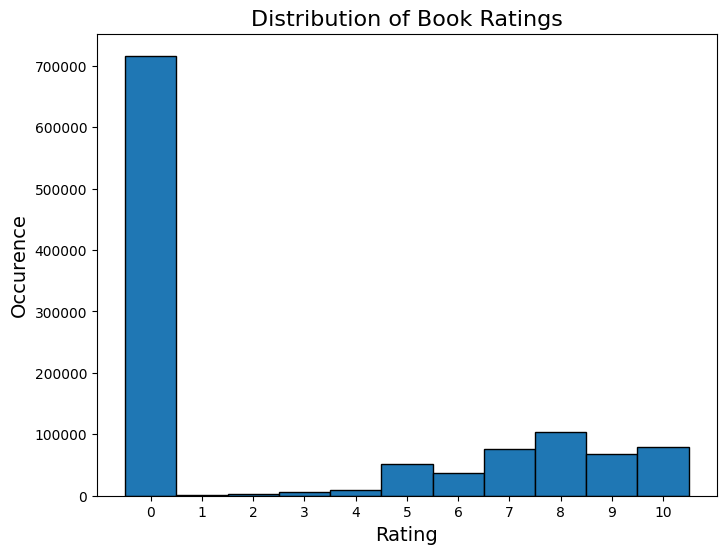

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(book_ratings_df["Book-Rating"], bins=11, range=(-0.5, 10.5), edgecolor="black")

plt.title("Distribution of Book Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Occurence", fontsize=14)
plt.xticks(range(11))

plt.show()


it"s clear that for whatever reason, there"s an insanely high amount of 0 ratings that it makes the score totally irrelevant, we will check again but this time ignore the 0 ratings

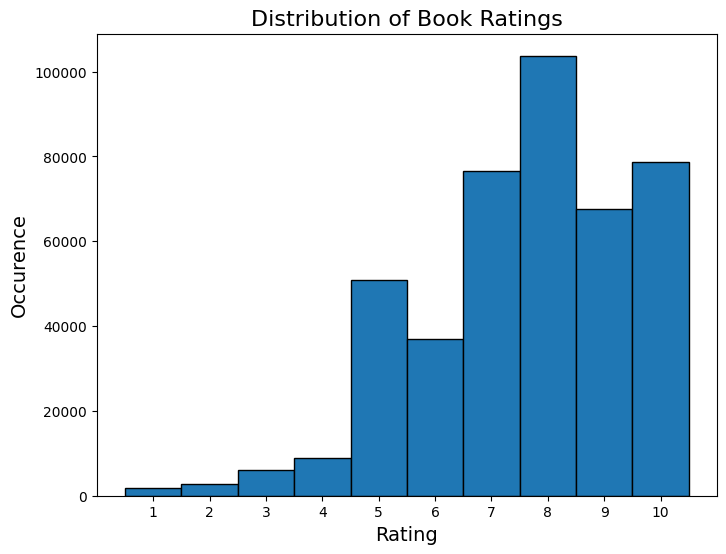

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(book_ratings_df["Book-Rating"], bins=10, range=(0.5, 10.5), edgecolor="black")

plt.title("Distribution of Book Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Occurence", fontsize=14)
plt.xticks(range(1, 11))

plt.show()

This new distribution (kinda) resembles a negative skew normal distribution, so we can safely drop 0 ratings and proceed

In [13]:
book_ratings_df = book_ratings_df[book_ratings_df["Book-Rating"] != 0]
book_ratings_df.describe()

,User-ID,Book-Rating
count,433671.000000,433671.000000
mean,135458.743451,7.601066
std,80678.385078,1.843798
min,8.000000,1.000000
25%,66619.000000,7.000000
50%,133184.000000,8.000000
75%,205735.000000,9.000000
max,278854.000000,10.000000


### Generating full review dataframe

In [14]:
df = pd.merge(users_df, book_ratings_df, on="User-ID")
df = pd.merge(df, books_df, on="ISBN")
df.to_csv("BX-Reviews.csv")
df.head(5)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,19,"weston, ,",14,0375759778,7,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks
1,8720,"anchorage, alaska, usa",31,0375759778,3,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks
2,24525,"denver, colorado, usa",28,0375759778,5,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks
3,38502,"new york, new york, usa",34,0375759778,8,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks
4,108789,"seattle, washington, usa",27,0375759778,7,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks


We can now use this to visualize the data

## Data Visualization

#### Best Selling Authors

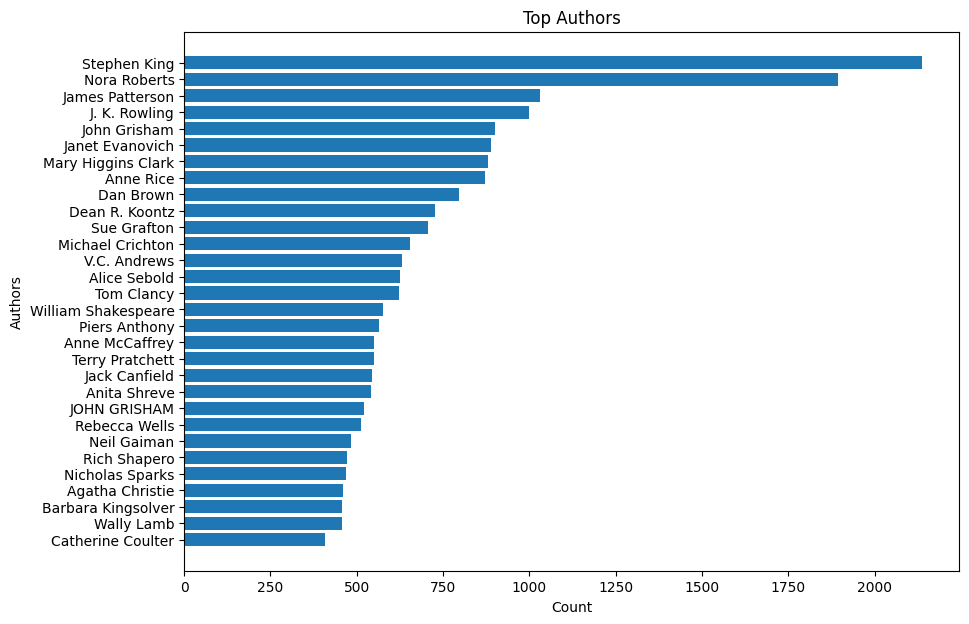

In [15]:
author_ratings = df["Book-Author"].value_counts().reset_index()
author_ratings.columns = ["value", "count"]
author_ratings = author_ratings.sort_values("count")

top30 = author_ratings.tail(30)
plt.figure(figsize=(10, 7))

bars = plt.barh(top30["value"], top30["count"])

plt.title("Top Authors")
plt.xlabel("Count")
plt.ylabel("Authors")

plt.show()

#### Best Selling Books

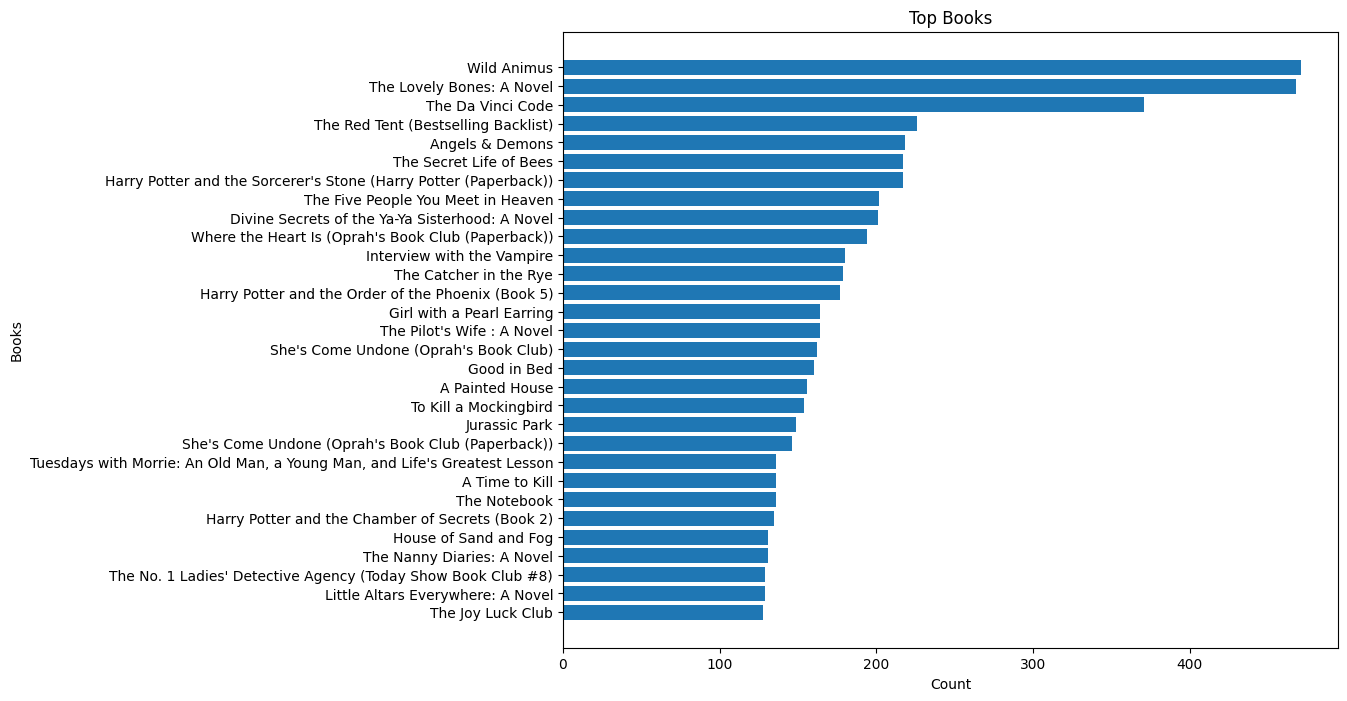

In [16]:
book_ratings = df["Book-Title"].value_counts().reset_index()
book_ratings.columns = ["value", "count"]
book_ratings = book_ratings.sort_values("count")

top30 = book_ratings.tail(30)
plt.figure(figsize=(10, 8))

bars = plt.barh(top30["value"], top30["count"])

plt.title("Top Books")
plt.xlabel("Count")
plt.ylabel("Books")

plt.show()

#### Users Age Distribution

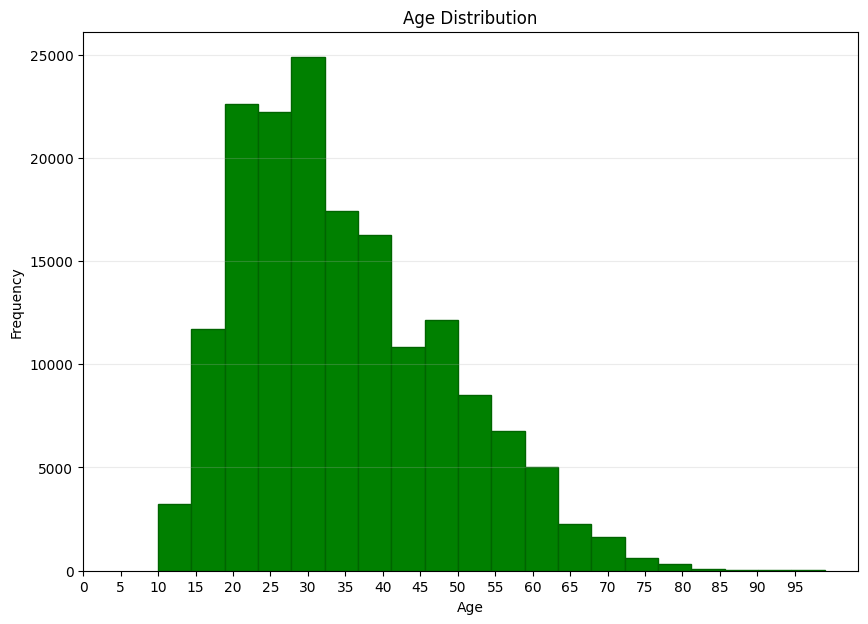

In [17]:
plt.figure(figsize=(10, 7))
plt.hist(users_df["Age"], bins=20, color="green", edgecolor="darkgreen")

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(range(0, 100, 5))

plt.grid(axis="y", alpha=0.25)
plt.show()

#### Distribution of Reviews by Country

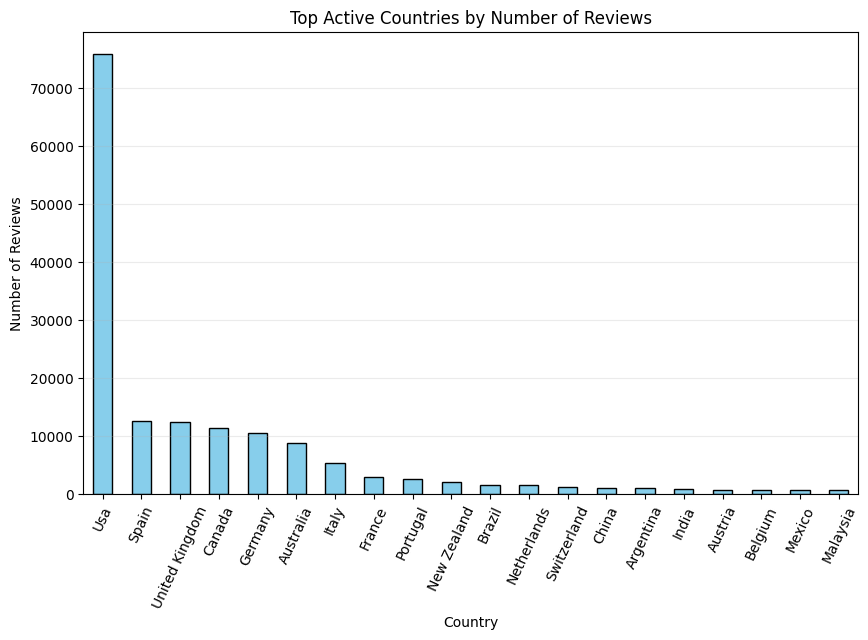

In [18]:
users_df["Country"] = users_df["Location"].str.extract(r",\s*([^,]+)$")[0].str.title()

country_counts = users_df["Country"].value_counts()

plt.figure(figsize=(10, 6))
country_counts.head(20).plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top Active Countries by Number of Reviews")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=65)  # Rotate x labels for better readability

plt.grid(axis="y", alpha=0.25)
plt.show()

#### TODO:
- More visualization
   for example Publisher's data, top books by rating, etc
- Data usage
   Book recommendation system? Finding out what genres are more popular at certain places? etc.
- ...